# NLTK 2

In [2]:
import nltk

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Reuters Corpus

In [11]:
from nltk.corpus import reuters
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [39]:
reuters.categories()[:7]

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa']

In [42]:
reuters.categories('test/14832')

['corn', 'grain', 'rice', 'rubber', 'sugar', 'tin', 'trade']

In [45]:
reuters.fileids('bop')[:4]

['test/14862', 'test/15543', 'test/15573', 'test/15646']

In [49]:
reuters.categories(['test/14832','test/14833'])

['corn',
 'grain',
 'palm-oil',
 'rice',
 'rubber',
 'sugar',
 'tin',
 'trade',
 'veg-oil']

In [50]:
reuters.words(categories='grain')

['CHINA', 'DAILY', 'SAYS', 'VERMIN', 'EAT', '7', '-', ...]

In [52]:
## Inaugural Address Corpus

In [56]:
from nltk.corpus import inaugural
inaugural.fileids()[:3]

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt']

In [59]:
[x[:8] for x in inaugural.fileids()][:5]

['1789-Was', '1793-Was', '1797-Ada', '1801-Jef', '1805-Jef']

In [63]:
cfd = nltk.ConditionalFreqDist(
        (target,fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['america','citizen']
        if w.lower().startswith(target))

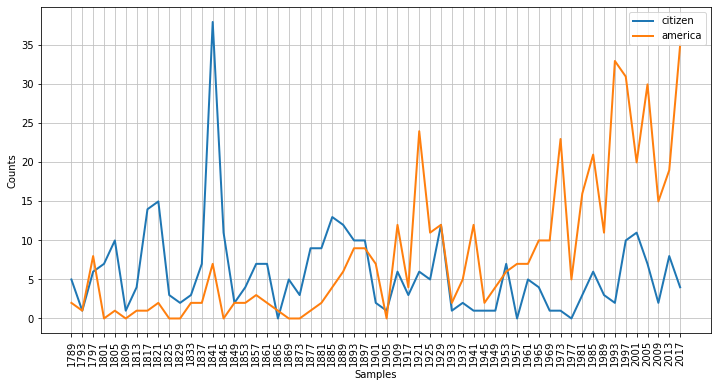

In [74]:
plt.figure(figsize=(12,6))
cfd.plot()

## Corpora in Other Languages

In [91]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [92]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [96]:
nltk.corpus.udhr.fileids()[:4]

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1']

In [105]:
nltk.corpus.udhr.sents('Arabic_Alarabia-Arabic')

[['الإعلان', 'العالمي', 'لحقوق', 'الإنسان', '(', 'أ', ')'], ['الديباجة', 'لم', 'ّ', 'ا', 'كان', 'الاعتراف', 'بالكرامة', 'المتأصلة', 'في', 'جميع', 'أعضاء', 'الأسرة', 'البشرية', 'وبحقوقهم', 'المتساوية', 'الثابتة', 'هو', 'أساس', 'الحرية', 'والعدل', 'والسلام', 'في', 'العالم', '.'], ...]

In [12]:
from nltk.corpus import udhr 
languages = ['Chickasaw','English','German_Deutsch','Greenlandic_Inuktikut','Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang,len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

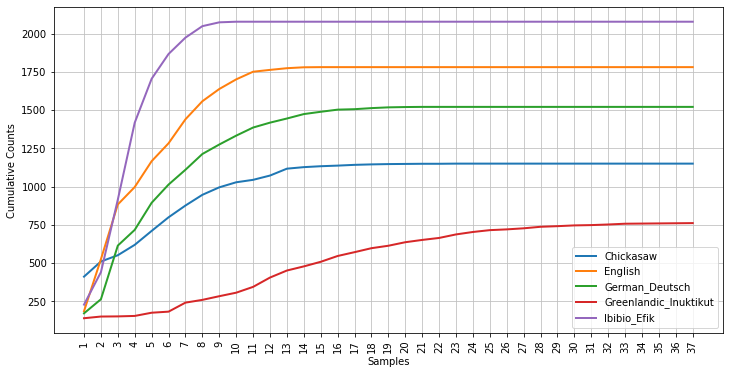

In [13]:
plt.figure(figsize=(12,6))
cfd.plot(cumulative=True)

In [120]:
raw_text=udhr.raw('Arabic_Alarabia-Arabic')
nltk.FreqDist(raw_text)

FreqDist({' ': 1321, 'ا': 973, 'ل': 763, 'ي': 428, 'م': 393, 'و': 352, 'ت': 276, 'ن': 257, 'ر': 232, 'ة': 231, ...})

## Loading Your Own Corpus

In [130]:
from nltk.corpus import PlaintextCorpusReader
corpus_root= r'C:\Users\Mohammad Zahrawi\Desktop\NLTK Materials'
wordlists = PlaintextCorpusReader(corpus_root,'.*')
wordlists.fileids()

In [133]:
wordlists.words('my_corpus.txt')

['Brian', 'O', "'", 'Driscoll', 'is', 'an', 'Irish', ...]

In [135]:
from nltk.corpus import BracketParseCorpusReader
corpus_root = r"C:\Users\Mohammad Zahrawi\Desktop\NLTK Materials"
file_pattern = r".*\.txt"
ptb = BracketParseCorpusReader(corpus_root, file_pattern)
ptb.fileids()

['my_corpus.txt']

## Conditional Frequency Distributions

In [156]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist((genre,word)
                              for genre in brown.categories()
                              for word in brown.words(categories=genre))

In [165]:
cfd.conditions()[:4]

['adventure', 'belles_lettres', 'editorial', 'fiction']

In [166]:
cfd['romance']['and']

1776

In [179]:
x=['romance','news','humor']
y=['a','love','man']
cfd.tabulate(conditions=x,samples=y)

           a love  man 
romance 1335   32   87 
   news 1993    3   72 
  humor  505    4   21 


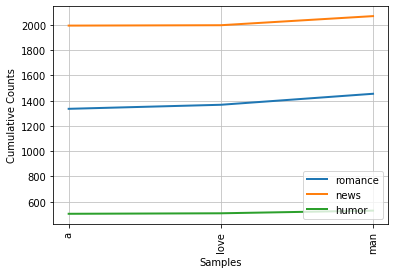

In [188]:
cfd.plot(conditions=x,samples=y,cumulative = True)

In [184]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [186]:
list(cfd['romance'])[:10]

[',', '.', 'the', 'and', 'to', 'a', 'of', '``', "''", 'was']

## Bigrams

In [262]:
s = ['as','matter','of','fact',',','UAE','is','the','best','country','for','livibg']
bi=nltk.bigrams(s)

In [263]:
list(bi)

[('as', 'matter'),
 ('matter', 'of'),
 ('of', 'fact'),
 ('fact', ','),
 (',', 'UAE'),
 ('UAE', 'is'),
 ('is', 'the'),
 ('the', 'best'),
 ('best', 'country'),
 ('country', 'for'),
 ('for', 'livibg')]

In [264]:
def generate_model(cfdist,word,num=15):
    for i in range(num):
        print(word)
        word = cfdist[word].max()
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams=nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [265]:
cfd['name']

FreqDist({'of': 42, 'was': 13, 'shall': 3, 'Se': 2, ',': 2, 'be': 2, 'called': 2, '?': 2, 'thereof': 1, 'Eve': 1, ...})

In [266]:
generate_model(cfd,'name')

name
of
the
land
of
the
land
of
the
land
of
the
land
of
the


## Lexical Resources

### Wordlist Corpora

In [7]:
import nltk
from nltk.corpus import words

In [15]:
def weird_words(text):
    text_vocab = set([w.lower() for w in text if w.isalpha()])
    english_vocab = set([w.lower() for w in words.words() ])
    weird = text_vocab.difference(english_vocab)
    return sorted(weird)
    

In [16]:
brown.categories()[:5]

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government']

In [20]:
weird_words(brown.words(categories='fiction'))[:11]

['abandoning',
 'abbe',
 'ablard',
 'abuses',
 'accepting',
 'accompanied',
 'accomplishing',
 'accounts',
 'accusing',
 'ached',
 'acres']

In [21]:
weird_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:7]

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses']

### stopwords

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
stopwords.words('arabic')[:5]

['إذ', 'إذا', 'إذما', 'إذن', 'أف']

In [37]:
def content_fraction(text):
    stopword = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopword]
    return len(content)/len(text)
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [111]:
puzzle_letters = nltk.FreqDist('mohammad')
obligatory='m'
wordlists = nltk.corpus.words.words()
li = [w for w in wordlists if len(w)>=6 and obligatory in w and nltk.FreqDist(w)<=puzzle_letters]

### Names Corpus

In [116]:
from nltk.corpus import names
names.fileids()

['female.txt', 'male.txt']

In [118]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

In [136]:
[w for w in male_names if w in female_names][55:62]

['Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil']

In [144]:
cfd = nltk.ConditionalFreqDist((fileid,word[-1])
                               for fileid in names.fileids()
                               for word in names.words(fileid))

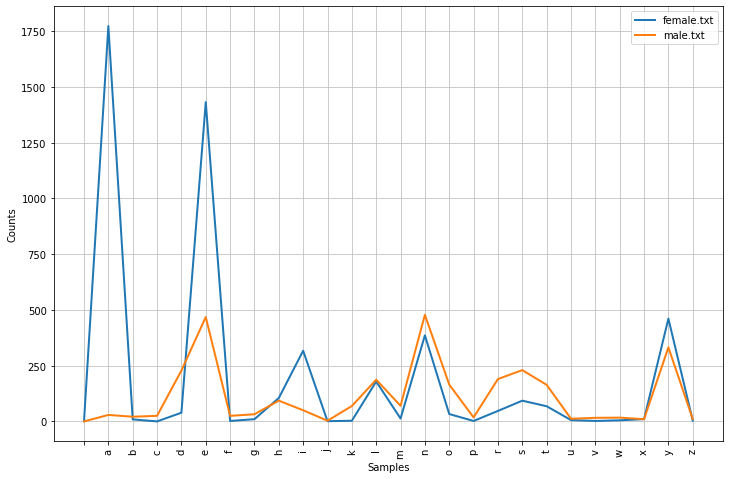

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
cfd.plot()

## A Pronouncing Dictionary

In [156]:
import nltk
entries = nltk.corpus.cmudict.entries()

In [159]:
entries[45:50]

[('abandons', ['AH0', 'B', 'AE1', 'N', 'D', 'AH0', 'N', 'Z']),
 ('abanto', ['AH0', 'B', 'AE1', 'N', 'T', 'OW0']),
 ('abarca', ['AH0', 'B', 'AA1', 'R', 'K', 'AH0']),
 ('abare', ['AA0', 'B', 'AA1', 'R', 'IY0']),
 ('abascal', ['AE1', 'B', 'AH0', 'S', 'K', 'AH0', 'L'])]

In [160]:
entries[45][0]

'abandons'

In [161]:
entries[45][1]

['AH0', 'B', 'AE1', 'N', 'D', 'AH0', 'N', 'Z']

In [179]:
for word,pron in entries:
    if len (pron)==4:
        ph1,ph2,ph3,ph4=pron
        if ph1=='K'and ph4=='R':
            print(word,ph2,ph3)

career ER0 IH1
claar L AA1
clair L EH1
claire L EH1
clar L AA1
clare L EH1
clear L IH1
cleere L IH1
clore L AO1
crear R IH1
creer R IH1
cure Y UH1
khmer M EH1
klahr L AE1
klar L AA1
klare L EH1
kleer L IH1
krauer R AW1
kreher R EH1
quarre W AA1
queer W IH1
quire W AY1


In [188]:
syllable = ['M','AH0','K','S']
[word for word,pron in entries if pron[-4:]==syllable]

['hammocks', 'lumex', 'stomachs']

In [189]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [203]:
set([word[:2] for word,pron in entries if pron[0]=='N' and word[0] !='N'])

{'gn', 'kn', 'mn', "n'", 'na', 'ne', 'ng', 'ni', 'no', 'nu', 'ny', 'pn'}

In [210]:
sorted(set(w[:3] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gna', 'gne', 'gno', 'gnu', 'kna', 'kne', 'kni', 'kno', 'knu', 'mne', 'pne']

In [224]:
# The phones contain digits to represent primary stress (1), secondary stress (2), and no stress (0)

def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]
[w for w,pron in entries if stress(pron)==['2','0','1','0','0','0']][:10]

['agriculturalist',
 'agriculturally',
 'architecturally',
 'coarticulated',
 'coarticulating',
 'coarticulation',
 'constitutionally',
 'contradictorily',
 'conversationalist',
 'counterespionage']

In [226]:
# we can also access it by looking up particular words.
pron_dict = nltk.corpus.cmudict.dict()

In [229]:
pron_dict['amazing']

[['AH0', 'M', 'EY1', 'Z', 'IH0', 'NG']]

In [231]:
pron_dict['literally']

[['L', 'IH1', 'T', 'ER0', 'AH0', 'L', 'IY0'],
 ['L', 'IH1', 'T', 'R', 'AH0', 'L', 'IY0']]

In [236]:
pron_dict['hdc']
# hoc is not in dict

KeyError: 'hdc'

## Comparative Wordlists

#### Swadesh wordlists, lists of about 200 common words in several languages

In [241]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [247]:
print(len(swadesh.words('en')))
print(len(swadesh.words('fr')))
print(len(swadesh.words('pl')))

207
207
207


In [254]:
swadesh.words('en')[105:110]

['fear', 'sleep', 'live', 'die', 'kill']

In [255]:
french_2_english = swadesh.entries(['fr','en'])
french_2_english[105:110]

[('craindre, avoir peur', 'fear'),
 ('dormir', 'sleep'),
 ('vivre', 'live'),
 ('mourir', 'die'),
 ('tuer', 'kill')]

In [258]:
english_2_italian = swadesh.entries(['en','it'])
english_2_italian[100:105]

[('see', 'vedere'),
 ('hear', 'udire, sentire'),
 ('know (a fact)', 'sapere'),
 ('think', 'pensare'),
 ('smell', 'odorare, annusare')]

In [264]:
translate=dict(english_2_italian)
translate['I']

'io'

In [265]:
translate['dog']

'cane'

In [269]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')[55]

('kaiea',
 [('rt', 'kaie'),
  ('ps', 'N'),
  ('pt', 'NT'),
  ('ge', 'rubbish'),
  ('ge', 'trash'),
  ('ge', 'garbage'),
  ('tkp', '???'),
  ('dt', '12/Feb/2005'),
  ('cmt', 'Is the second sentence a command or a sentence fragment?'),
  ('ex', 'Kaiea vao voia kepa-ia.'),
  ('xp', 'Pipia em istap long house.'),
  ('xe', 'The trash is in the house.'),
  ('ex', 'Kaieara vikisia eisi rikui.'),
  ('xp', 'Go tromoe ol pipia long hol.'),
  ('xe', 'throw trash in the hole.')])

## WordNet

In [1]:
from nltk.corpus import wordnet as wn

In [9]:
wn.synsets('motorcar')

[Synset('car.n.01')]

In [17]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [12]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [14]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

##### This pairing of a synset with a word is called a lemma.

In [19]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [21]:
wn.lemma('car.n.01.machine')

Lemma('car.n.01.machine')

In [22]:
wn.lemma('car.n.01.machine').synset()

Synset('car.n.01')

In [23]:
wn.lemma('car.n.01.machine').name()

'machine'

In [25]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [27]:
for i in wn.synsets('car'):
    print(i.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [47]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [82]:
print(wn.synsets('dish'))
print('LEMMA')
print(wn.synset('dish.n.04').lemma_names())
print('definition')
print(wn.synset('dish.n.04').definition())
print('example')
print(wn.synset('dish.n.02').examples())

[Synset('dish.n.01'), Synset('dish.n.02'), Synset('dish.n.03'), Synset('smasher.n.02'), Synset('dish.n.05'), Synset('cup_of_tea.n.01'), Synset('serve.v.06'), Synset('dish.v.02')]
LEMMA
['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']
definition
a very attractive or seductive looking woman
example
['she prepared a special dish for dinner']


In [72]:
wn.synset('dish.n.04').lemmas()

[Lemma('smasher.n.02.smasher'),
 Lemma('smasher.n.02.stunner'),
 Lemma('smasher.n.02.knockout'),
 Lemma('smasher.n.02.beauty'),
 Lemma('smasher.n.02.ravisher'),
 Lemma('smasher.n.02.sweetheart'),
 Lemma('smasher.n.02.peach'),
 Lemma('smasher.n.02.lulu'),
 Lemma('smasher.n.02.looker'),
 Lemma('smasher.n.02.mantrap'),
 Lemma('smasher.n.02.dish')]

In [83]:
print(wn.lemma('smasher.n.02.sweetheart'))
print(wn.lemma('smasher.n.02.sweetheart').synset())
print(wn.lemma('smasher.n.02.sweetheart').name())

Lemma('smasher.n.02.sweetheart')
Synset('smasher.n.02')
sweetheart


 ## The WordNet Hierarchy

In [117]:
motorcar = wn.synset('car.n.01')
motorcar

Synset('car.n.01')

In [126]:
types_of_motorcar = motorcar.hyponyms()
print(types_of_motorcar[25])

Synset('sports_car.n.01')


In [125]:
names = [lemma.name() for i in types_of_motorcar for lemma in i.lemmas()]
print(names)

['ambulance', 'beach_wagon', 'station_wagon', 'wagon', 'estate_car', 'beach_waggon', 'station_waggon', 'waggon', 'bus', 'jalopy', 'heap', 'cab', 'hack', 'taxi', 'taxicab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'police_cruiser', 'patrol_car', 'police_car', 'prowl_car', 'squad_car', 'electric', 'electric_automobile', 'electric_car', 'gas_guzzler', 'hardtop', 'hatchback', 'horseless_carriage', 'hot_rod', 'hot-rod', 'jeep', 'landrover', 'limousine', 'limo', 'loaner', 'minicar', 'minivan', 'Model_T', 'pace_car', 'racer', 'race_car', 'racing_car', 'roadster', 'runabout', 'two-seater', 'sedan', 'saloon', 'sport_utility', 'sport_utility_vehicle', 'S.U.V.', 'SUV', 'sports_car', 'sport_car', 'Stanley_Steamer', 'stock_car', 'subcompact', 'subcompact_car', 'touring_car', 'phaeton', 'tourer', 'used-car', 'secondhand_car']


In [134]:
print(motorcar.hypernyms())
path = motorcar.hypernym_paths()
print(len(path))

[Synset('motor_vehicle.n.01')]
2


In [151]:
[synset.name() for synset in path[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [153]:
[synset.name() for synset in path[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [154]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## More Lexical Relations

#### Another important way to navigate the WordNet network is from items to their components (meronyms) or to the things they are contained in (holonyms).

In [164]:
wn.synsets('tree')

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [168]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [170]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [172]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [202]:
print(wn.synsets('mint'))
print('')
print(wn.synset('mint.n.02').lemma_names())
print('')
print(wn.synset('mint.n.02').part_meronyms())
print('definition of mint 4 is ',wn.synset('mint.n.04').definition())
print('')
print(wn.synset('mint.n.04').substance_holonyms())


[Synset('batch.n.02'), Synset('mint.n.02'), Synset('mint.n.03'), Synset('mint.n.04'), Synset('mint.n.05'), Synset('mint.n.06'), Synset('mint.v.01'), Synset('mint.s.01')]

['mint']

[Synset('mint.n.04')]
definition of mint 4 is  the leaves of a mint plant used fresh or candied

[Synset('mint.n.05')]


## entails & antonymy

In [5]:
from nltk.corpus import wordnet as wn
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [13]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [16]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

#### Some lexical relationships hold between lemmas
#### opposite words

In [20]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [24]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [29]:
wn.lemma('hold.v.02.hold').antonyms()

[Lemma('let_go_of.v.01.let_go_of')]

In [33]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [34]:
wn.synset('baleen_whale.n.01').hyponyms()

[Synset('blue_whale.n.01'),
 Synset('bowhead.n.01'),
 Synset('grey_whale.n.01'),
 Synset('humpback.n.03'),
 Synset('right_whale.n.01'),
 Synset('rorqual.n.01')]

In [42]:
# If two synsets share a very specific hypernym—one that is low down in the hypernym hierarchy
print(right.lowest_common_hypernyms(orca))
print(right.lowest_common_hypernyms(tortoise))
print(right.lowest_common_hypernyms(tortoise))

[Synset('whale.n.02')]
[Synset('vertebrate.n.01')]
[Synset('vertebrate.n.01')]


In [43]:
# We can quantify this concept of generality by looking up the depth of each synset
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('whale.n.02').min_depth())
print(wn.synset('vertebrate.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
13
8
0


In [44]:
# Similarity measures have been defined over the collection of WordNet synsets that
#incorporate this insight.
print(right.path_similarity(minke))
print(right.path_similarity(orca))
print(right.path_similarity(tortoise))

0.25
0.16666666666666666
0.07692307692307693


In [45]:
help(wn)

Help on WordNetCorpusReader in module nltk.corpus.reader.wordnet object:

class WordNetCorpusReader(nltk.corpus.reader.api.CorpusReader)
 |  WordNetCorpusReader(root, omw_reader)
 |  
 |  A corpus reader used to access wordnet or its variants.
 |  
 |  Method resolution order:
 |      WordNetCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, omw_reader)
 |      Construct a new wordnet corpus reader, with the given root
 |      directory.
 |  
 |  all_lemma_names(self, pos=None, lang='eng')
 |      Return all lemma names for all synsets for the given
 |      part of speech tag and language or languages. If pos is
 |      not specified, all synsets for all parts of speech will
 |      be used.
 |  
 |  all_synsets(self, pos=None)
 |      Iterate over all synsets with a given part of speech tag.
 |      If no pos is specified, all synsets for all parts of speech
 |      will be loaded.
 |  
 |  cita

In [48]:
nltk.corpus.verbnet

<VerbnetCorpusReader in 'C:\\Users\\Mohammad Zahrawi\\AppData\\Roaming\\nltk_data\\corpora\\verbnet'>